<a href="https://colab.research.google.com/github/vaishnavi-1/CNN-models/blob/master/102_Flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
cd '/content/drive/My Drive/sblock/102Flower'

/content/drive/My Drive/sblock/102Flower


In [6]:
!wget http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
!tar -xzf 102flowers.tgz
!rm 102flowers.tgz
!wget http://www.robots.ox.ac.u
k/~vgg/data/flowers/102/imagelabels.mat

--2020-08-10 03:39:27--  http://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 344862509 (329M) [application/x-gzip]
Saving to: ‘102flowers.tgz’

102flowers.tgz      100%[===================>] 328.89M  10.4MB/s    in 34s     

2020-08-10 03:40:03 (9.58 MB/s) - ‘102flowers.tgz’ saved [344862509/344862509]

--2020-08-10 03:43:56--  http://www.robots.ox.ac.u/
Resolving www.robots.ox.ac.u (www.robots.ox.ac.u)... failed: Name or service not known.
wget: unable to resolve host address ‘www.robots.ox.ac.u’


NameError: ignored

In [11]:

import os
import numpy as np
import scipy.io
import cv2
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [12]:

img_labels = scipy.io.loadmat("imagelabels.mat")
img_labels = img_labels["labels"]
img_labels = img_labels[0]
for i in range(len(img_labels)):
  img_labels[i] = img_labels[i] - 1

In [13]:
train_x = []
train_y = []
dir = "jpg/"
for imgs in os.listdir(dir):
  img_num = int(imgs[7:11])-1
  train_y.append(img_labels[img_num])
  image = cv2.imread(os.path.join(dir, imgs))
  resized = cv2.resize(image, (150,150))
  normalized_img = cv2.normalize(resized, None, alpha=0, beta=1, 
                            norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
  train_x.append(normalized_img)
train_x = np.array(train_x)

In [16]:

trainx, valx, trainy, valy = train_test_split(train_x, train_y, test_size=0.15, random_state=10)

In [17]:
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960


In [18]:
training_images= trainx/255.0
test_images=valx/255.0
 
training_images = trainx.reshape((6960,150,150,3))
valx = valx.reshape((1229,150,150,3))
print('Training Dataset Shape: ­{}'.format(trainx.shape))
print('No. of Training Dataset Labels: {}'.format(len(trainy)))
print('Test Dataset Shape: {}'.format(valx.shape))
print('No. of Test Dataset Labels: {}'.format(len(valy)))

Training Dataset Shape: ­(6960, 150, 150, 3)
No. of Training Dataset Labels: 6960
Test Dataset Shape: (1229, 150, 150, 3)
No. of Test Dataset Labels: 1229


In [19]:
trainy = to_categorical(trainy)
valy = to_categorical(valy)

In [20]:
print(type(test_images))
print(type(valy))
from numpy import save
save('test_images.npy', training_images)
save('test_lables.npy',trainy)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


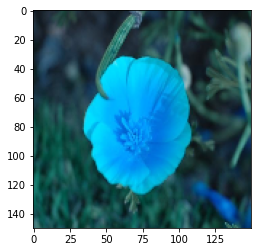

In [21]:
import matplotlib.pyplot as plt
plt.imshow(training_images[123])
print(trainy[123])

In [22]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model = Sequential()
# #Layer 1
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(150, 150, 3),strides=(2,2)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
 
# #Layer 2
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.4))
# #Layer 3
 
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
# #Layer 4
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))

# #Input to Neural Network is flattened
model.add(Flatten())
# #1st hidden layer with 512 neurons/nodes
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))
# #Output layer with 102 nodes for classifying 102 flowers
model.add(Dense(102, activation='softmax'))
 
"""## Compiling and Training the Neural Network"""
 
#Compile the neural network
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
 
#Train the network
model.fit(trainx, trainy, validation_data = (valx, valy), epochs=80, batch_size=200)

Epoch 1/80
35/35 [==============================] - 4s 107ms/step - loss: 4.5192 - accuracy: 0.0343 - val_loss: 4.4400 - val_accuracy: 0.0537
Epoch 2/80
35/35 [==============================] - 3s 91ms/step - loss: 4.1767 - accuracy: 0.0559 - val_loss: 4.0423 - val_accuracy: 0.0871
Epoch 3/80
35/35 [==============================] - 3s 90ms/step - loss: 3.8583 - accuracy: 0.0833 - val_loss: 3.7839 - val_accuracy: 0.1041
Epoch 4/80
35/35 [==============================] - 3s 90ms/step - loss: 3.6844 - accuracy: 0.0981 - val_loss: 3.6535 - val_accuracy: 0.1522
Epoch 5/80
35/35 [==============================] - 3s 90ms/step - loss: 3.5104 - accuracy: 0.1259 - val_loss: 3.4588 - val_accuracy: 0.1595
Epoch 6/80
35/35 [==============================] - 3s 88ms/step - loss: 3.3048 - accuracy: 0.1634 - val_loss: 3.1948 - val_accuracy: 0.1920
Epoch 7/80
35/35 [==============================] - 3s 92ms/step - loss: 3.1308 - accuracy: 0.2026 - val_loss: 3.0337 - val_accuracy: 0.2392
Epoch 8/80
3

In [23]:
model.save('model.h5')
print('model saved')

model saved


In [24]:
from keras.models import load_model
model = load_model("model.h5")
 
score = model.evaluate(valx, valy)
 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])
 
#Predict output on sample input data
pred = model.predict(valx) 
pred = np.argmax(pred, axis = 1)[:20] 
label = np.argmax(valy,axis = 1)[:20] 
 
print("Predicted labels:",pred) 
print("Actual Labels:   ",label)

39/39 [==============================] - 0s 10ms/step - loss: 1.6513 - accuracy: 0.6420
Test loss: 1.6513481140136719
Test accuracy: 0.6419853568077087
Predicted labels: [74 93 94 80 91 93 97 93 66 29 93 41 87 50 45 76 84  4 73 23]
Actual Labels:    [74 17 82 80 91 67  2 93 66 29 81 41 87 71 73 21  2  4 52 83]


In [25]:

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       1